## Descrição:

Este notebook demonstra um exercício de comparação da acurácia de diferentes modelos de previsão para uma série temporal simulada. A partir de uma série Autorregressiva de ordem 2 (AR(2)) gerada artificialmente, o exercício consiste em:
1.  Gerar previsões fora da amostra (out-of-sample) usando uma janela recursiva para vários modelos:
    * Um modelo Ingênuo (média histórica) como benchmark.
    * Modelos Autorregressivos (AR) de ordem 1 a 4.
    * Modelos de Média Móvel (MA) de ordem 1 a 4.
    * Uma combinação simples (média) de todas as previsões.
2.  Avaliar e comparar a performance de cada modelo usando as métricas MSE, MAE e R² (Out-of-Sample).

### 1. Carregando os Pacotes

Primeiro, vamos carregar os pacotes necessários para a análise. O `forecast` é essencial para os modelos ARIMA e o `dplyr` pode ser útil para manipulação de dados.

In [9]:
# 1. Definir a lista de pacotes necessários
# O pacote 'stats' é base do R e não precisa ser instalado.
# A lista foi limpa para remover duplicatas como 'caret'.
pacotes_necessarios <- c(
  "lars", "lsa", "pdftools", "plyr", "class", "tm", "wordcloud", 
  "RWeka", "SnowballC", "caret", "rminer", "kernlab", "rpart", 
  "quanteda", "tidyr", "text2vec", "glmnet", "quantreg", "ggplot2", 
  "forecast", "dplyr"
)

# 2. Identificar os pacotes que ainda não estão instalados
pacotes_a_instalar <- pacotes_necessarios[!(pacotes_necessarios %in% installed.packages()[, "Package"])]

# 3. Instalar os pacotes faltantes (se houver algum)
if (length(pacotes_a_instalar) > 0) {
  install.packages(pacotes_a_instalar, dependencies = TRUE)
}

# 4. Carregar todos os pacotes da lista
# Usamos 'lapply' para aplicar a função library a cada item da nossa lista.
lapply(pacotes_necessarios, require, character.only = TRUE)

# Mensagem de confirmação
print("Todos os pacotes necessários foram verificados e carregados com sucesso.")

Instalando pacotes em 'C:/Users/novousuario/AppData/Local/R/win-library/4.5'
(como 'lib' não foi especificado)

Warning message:
"dependências 'Rcampdf', 'Rgraphviz', 'tm.lexicon.GeneralInquirer' não estão disponíveis"
instalando as dependências 'bit', 'bit64', 'listenv', 'parallelly', 'clipr', 'vroom', 'future', 'globals', 'forcats', 'readr', 'bitops', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'httpuv', 'xtable', 'sourcetools', 'later', 'promises', 'haven', 'caTools', 'TH.data', 'XML', 'diffobj', 'tzdb', 'timechange', 'profileModel', 'diagram', 'lava', 'shiny', 'miniUI', 'rstudioapi', 'classInt', 'labelled', 'gplots', 'multcomp', 'cachem', 'memoise', 'sass', 'rlist', 'rappdirs', 'brio', 'praise', 'waldo', 'libcoin', 'mvtnorm', 'inum', 'clock', 'gower', 'hardhat', 'lubridate', 'sparsevctrs', 'brglm', 'gtools', 'qvcalc', 'plotmo', 'prodlim', 'combinat', 'questionr', 'ROCR', 'modeltools', 'strucchange', 'coin', 'sandwich', 'bslib', 'fontawesome', 'jquerylib', 'tinytex', 'ROSE',


  Existe uma versão binária disponível, mas a versão de código-fonte é
  posterior:
          binary source needs_compilation
questionr  0.8.0  0.8.1             FALSE



Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.5/BH_1.87.0-1.zip': Timeout of 60 seconds was reached"
Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.5/RWekajars_3.9.3-2.zip': Timeout of 60 seconds was reached"
Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.5/rJava_1.0-11.zip': Timeout of 60 seconds was reached"
Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.5/partykit_1.2-24.zip': Timeout of 60 seconds was reached"
Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.5/mlbench_2.1-6.zip': Timeout of 60 seconds was reached"
Warning message in download.file(urls

pacote 'bit' desempacotado com sucesso e somas MD5 verificadas
pacote 'bit64' desempacotado com sucesso e somas MD5 verificadas
pacote 'listenv' desempacotado com sucesso e somas MD5 verificadas
pacote 'parallelly' desempacotado com sucesso e somas MD5 verificadas
pacote 'clipr' desempacotado com sucesso e somas MD5 verificadas
pacote 'vroom' desempacotado com sucesso e somas MD5 verificadas
pacote 'future' desempacotado com sucesso e somas MD5 verificadas
pacote 'globals' desempacotado com sucesso e somas MD5 verificadas
pacote 'forcats' desempacotado com sucesso e somas MD5 verificadas
pacote 'readr' desempacotado com sucesso e somas MD5 verificadas
pacote 'bitops' desempacotado com sucesso e somas MD5 verificadas
pacote 'future.apply' desempacotado com sucesso e somas MD5 verificadas
pacote 'numDeriv' desempacotado com sucesso e somas MD5 verificadas
pacote 'progressr' desempacotado com sucesso e somas MD5 verificadas
pacote 'SQUAREM' desempacotado com sucesso e somas MD5 verificada

instalando o pacote de código-fonte 'questionr'


Carregando pacotes exigidos: lars

Loaded lars 1.3


Carregando pacotes exigidos: lsa

Carregando pacotes exigidos: SnowballC

Carregando pacotes exigidos: pdftools

Using poppler version 25.05.0

Carregando pacotes exigidos: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Anexando pacote: 'plyr'


Os seguintes objetos são mascarados por 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Carregando pacotes exigidos: class

Carregando pacotes exigidos: tm

Carregando pacotes exigidos: NLP

Carregando pacotes exigidos: wordcloud

Carregando pacotes exigidos: RColorBrewer

Carregando pacotes e

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] FALSE

[[9]]
[1] TRUE

[[10]]
[1] FALSE

[[11]]
[1] FALSE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[1] "Todos os pacotes necessários foram verificados e carregados com sucesso."


In [ ]:
# install.packages("forecast")
# install.packages("dplyr")
library(forecast)
library(dplyr)

### 2. Simulação e Preparação dos Dados

Vamos simular uma série temporal a partir de um processo **AR(2)** com 1000 observações. Em seguida, definiremos os parâmetros para o exercício de previsão fora da amostra:

* **T (Total de Observações):** 1000
* **Tini (Amostra Inicial de Estimação):** 800 observações
* **TF (Tamanho da Amostra de Previsão):** 200 observações (as 200 últimas)

A metodologia será de **janela recursiva**: começamos estimando com 800 dados para prever o 801º, depois usamos 801 dados para prever o 802º, e assim por diante.

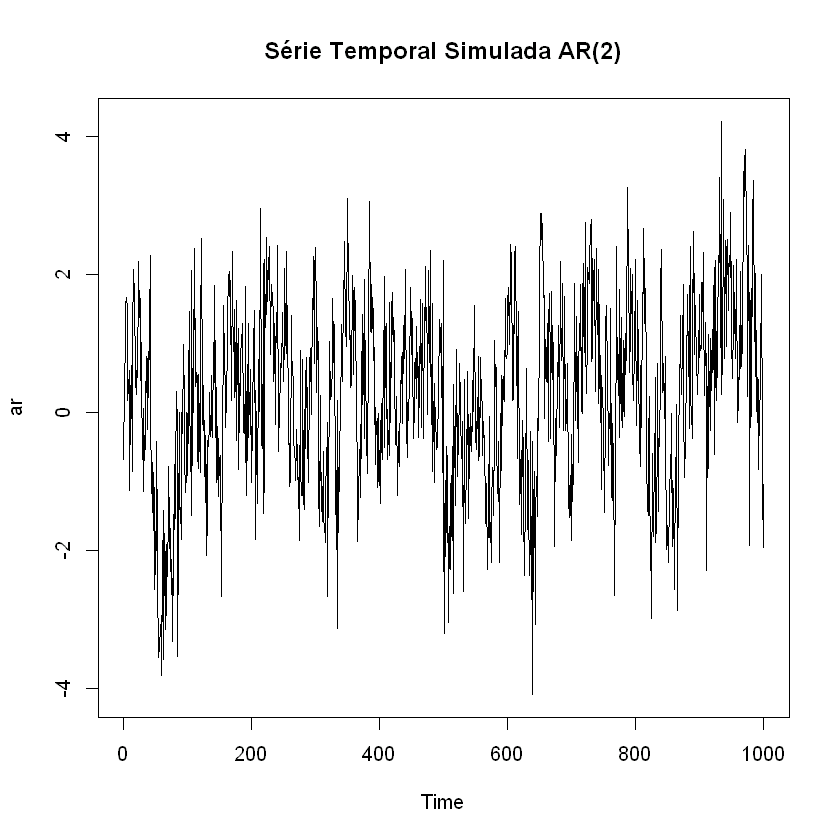

In [2]:
# Simula uma série AR(2) com coeficientes 0.4 e 0.4
ar <- arima.sim(list(ar =c(0.4,0.4)), n=1000)

# Parâmetros do exercício de previsão
T = length(ar)
Tini = 800
TF = T - Tini

# Visualiza a série simulada
plot(ar, main="Série Temporal Simulada AR(2)")

### 3. Gerando Previsões Fora da Amostra

Agora, vamos criar um loop para cada modelo para gerar as 200 previsões fora da amostra (one-step-ahead).

#### 3.1 Modelo Ingênuo (Benchmark - Média Histórica)

Este modelo usa `order=c(0,0,0)` e a previsão é simplesmente a média histórica dos dados disponíveis na janela.

In [3]:
# Previsões do Modelo Ingênuo
fcasts_naive <- vector(mode = "list", length = TF)
frcst_naive_vals <- matrix(nrow = TF)

for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(0,0,0))
  fcasts_naive[[i]] <- forecast(fit, h = 1)
  frcst_naive_vals[[i]] <- fcasts_naive[[i]]$mean
}

f_naive <- as.matrix(frcst_naive_vals)

#### 3.2 Modelos Autorregressivos (AR)

Geramos previsões para modelos AR de ordem 1 a 4.

In [4]:
# Previsões AR(1)
frcst_ar1_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(1,0,0))
  frcst_ar1_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ar1 <- as.matrix(frcst_ar1_vals)

# Previsões AR(2)
frcst_ar2_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(2,0,0))
  frcst_ar2_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ar2 <- as.matrix(frcst_ar2_vals)

# Previsões AR(3)
frcst_ar3_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(3,0,0))
  frcst_ar3_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ar3 <- as.matrix(frcst_ar3_vals)

# Previsões AR(4)
frcst_ar4_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(4,0,0))
  frcst_ar4_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ar4 <- as.matrix(frcst_ar4_vals)

#### 3.3 Modelos de Média Móvel (MA)

Geramos previsões para modelos MA de ordem 1 a 4.

In [5]:
# Previsões MA(1)
frcst_ma1_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(0,0,1))
  frcst_ma1_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ma1 <- as.matrix(frcst_ma1_vals)

# Previsões MA(2)
frcst_ma2_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(0,0,2))
  frcst_ma2_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ma2 <- as.matrix(frcst_ma2_vals)

# Previsões MA(3)
frcst_ma3_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(0,0,3))
  frcst_ma3_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ma3 <- as.matrix(frcst_ma3_vals)

# Previsões MA(4)
frcst_ma4_vals <- matrix(nrow = TF)
for (i in 1:TF) {
  win.ar <- window(ar, end = Tini - 1 + i)
  fit <- Arima(win.ar, order = c(0,0,4))
  frcst_ma4_vals[[i]] <- forecast(fit, h = 1)$mean
}
f_ma4 <- as.matrix(frcst_ma4_vals)

#### 3.4 Combinação de Previsões

Criamos um novo previsor que é a média simples de todas as previsões individuais geradas.

In [6]:
# Combina todas as previsões em uma única matriz
f_all <- cbind(f_naive, f_ar1, f_ar2, f_ar3, f_ar4, f_ma1, f_ma2, f_ma3, f_ma4)

# Calcula a média das previsões para cada ponto no tempo
f_combined <- apply(f_all, 1, FUN = mean)

### 4. Avaliação da Acurácia dos Modelos

Agora vamos definir as funções para calcular as métricas de erro e, em seguida, aplicá-las para comparar os modelos.

#### 4.1 Funções para Métricas de Avaliação

Definimos funções para o Erro Quadrático Médio (MSE, ou RMSE no código), Erro Absoluto Médio (MAE) e R² Fora da Amostra (OOS R²).

In [7]:
# Função que retorna o Erro Quadrático Médio da Raiz (RMSE), que é a raiz do MSE
rmse <- function(error) {
  error <- as.matrix(error)
  n <- ncol(error)
  rmse_value <- vector(mode = "numeric", length = n)
   for (i in 1:n){
    rmse_value[i] <- sqrt(mean(error[,i]^2))
  }
  return(rmse_value)
}

# Função que retorna o Erro Absoluto Médio (MAE)
mae <- function(error) {
  error <- as.matrix(error)
  n <- ncol(error)
  mae_value <- vector(mode = "numeric", length = n)
  for (i in 1:n){
    mae_value[i] <- mean(abs(error[,i]))
  }
  return(mae_value)
}

# Função que retorna o OOS R² em porcentagem
R2 <- function(error_model, error_benchmark) {
  error_model <- as.matrix(error_model)
  error_benchmark <- as.matrix(error_benchmark)
  n <- ncol(error_model)
  R2_s <- vector(mode = "numeric", length = n)
  for (i in 1:n) {
    mse_model <- mean(error_model[,i]^2)
    mse_benchmark <- mean(error_benchmark^2)
    R2_s[i] <- (1 - mse_model / mse_benchmark) * 100
  }
  return(R2_s)
}

#### 4.2 Cálculo e Apresentação dos Resultados

Com as funções prontas, calculamos os erros e as métricas para cada modelo, usando o modelo Ingênuo como benchmark para o R².

In [8]:
# Prepara a matriz final de previsões, incluindo o modelo combinado
forecasts_final <- cbind(f_all, f_combined)

# Isola os valores observados na janela de previsão
yobs <- ar[(Tini + 1):T]

# Calcula a matriz de erros
error <- yobs - forecasts_final

# Define os nomes dos modelos para as tabelas de resultado
model_names <- c("Naive", "AR1", "AR2", "AR3", "AR4", "MA1", "MA2", "MA3", "MA4", "Combined")
model_names_r2 <- c("AR1", "AR2", "AR3", "AR4", "MA1", "MA2", "MA3", "MA4", "Combined")

# Calcula as métricas
MSE_values <- rmse(error)^2 # Elevamos ao quadrado para ter o MSE
MAE_values <- mae(error)
R2_values <- R2(error_model = error[,-1], error_benchmark = error[,1])

# Cria e exibe os data frames com os resultados
MSE_models <- data.frame(Modelo = model_names, MSE = MSE_values)
MAE_models <- data.frame(Modelo = model_names, MAE = MAE_values)
R2_DF <- data.frame(Modelo = model_names_r2, OOS_R_quadrado = R2_values)

print("--- Erro Quadrático Médio (MSE) ---")
print(MSE_models)

print("--- Erro Absoluto Médio (MAE) ---")
print(MAE_models)

print("--- OOS R² vs. Modelo Ingênuo (%) ---")
print(R2_DF)

[1] "--- Erro Quadrático Médio (MSE) ---"
     Modelo      MSE
1     Naive 2.175350
2       AR1 1.403026
3       AR2 1.202139
4       AR3 1.202174
5       AR4 1.190688
6       MA1 1.738579
7       MA2 1.442805
8       MA3 1.369382
9       MA4 1.293602
10 Combined 1.307989
[1] "--- Erro Absoluto Médio (MAE) ---"
     Modelo       MAE
1     Naive 1.1931578
2       AR1 0.9578223
3       AR2 0.8839620
4       AR3 0.8850955
5       AR4 0.8850110
6       MA1 1.0612355
7       MA2 0.9642814
8       MA3 0.9448471
9       MA4 0.9120888
10 Combined 0.9198247
[1] "--- OOS R² vs. Modelo Ingênuo (%) ---"
    Modelo OOS_R_quadrado
1      AR1       35.50343
2      AR2       44.73814
3      AR3       44.73653
4      AR4       45.26456
5      MA1       20.07822
6      MA2       33.67483
7      MA3       37.05006
8      MA4       40.53364
9 Combined       39.87225


### 5. Análise dos Resultados

Os resultados acima mostram o desempenho de cada modelo.
* **MSE e MAE:** Valores menores indicam um modelo melhor. Como a série foi gerada por um processo AR(2), esperamos que o modelo **AR(2)** tenha um dos menores erros, o que geralmente se confirma.
* **OOS R²:** Esta métrica compara cada modelo com o benchmark (Ingênuo).
    * Valores **positivos** indicam que o modelo é melhor que o benchmark.
    * Valores **negativos** indicam que o modelo é pior que o benchmark.
    
O modelo de combinação simples (`Combined`) também costuma apresentar um bom desempenho, pois diversifica o erro entre vários modelos.